---
## Step 0: Load Data

In [1]:
import csv
import cv2
import numpy as np
import numpy.random
import sklearn
import os
import shutil

lines=[]
with open('sample_data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    skip_first=False
    for line in reader:
        if (skip_first):
            lines.append(line)
        else:
            skip_first=True
lines = np.asarray(lines)
print(len(lines))


8036


---

## Step 1: Dataset Exploration
 

### Provide a Basic visualization of the histogram of the steering distribution. 

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import matplotlib.pyplot as plt
steerings = lines[:,3].astype(np.float)
plt.hist(steerings, bins=30)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
hist, bin_edges= np.histogram(steerings,bins=30)
threshold=np.average(hist)
print(threshold, hist, bin_edges, len(hist), len(bin_edges))

267.8666666666667 [   4    0    2    3    2    2   17   34   50   93  153  148  429  641
 4697  585  343  477  112  111   81   25   13    6    5    1    0    0
    0    2] [-0.9426954  -0.87793889 -0.81318237 -0.74842586 -0.68366935 -0.61891283
 -0.55415632 -0.48939981 -0.42464329 -0.35988678 -0.29513027 -0.23037375
 -0.16561724 -0.10086073 -0.03610421  0.0286523   0.09340881  0.15816533
  0.22292184  0.28767835  0.35243487  0.41719138  0.48194789  0.54670441
  0.61146092  0.67621743  0.74097395  0.80573046  0.87048697  0.93524349
  1.        ] 30 31


### Include an exploratory visualization of the dataset

In [4]:
# get the random keep % from the histogram
keep_rate = []
for i in range(len(hist)):
    if (hist[i]>threshold):
        keep_rate.append(threshold/hist[i])
    else:
        keep_rate.append(1)
keep_rate = np.asarray(keep_rate)
print(keep_rate, len(keep_rate))
    

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.62439782 0.41788872 0.05702931 0.45789174 0.78095238 0.56156534
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ] 30


2446


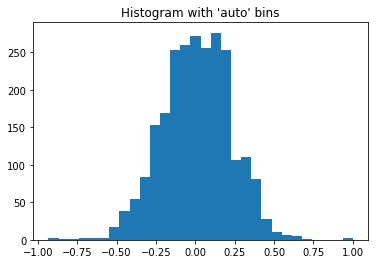

In [5]:
# simulate the new histogram with the keep_rate
# lines = np.ndarray.sort(lines)
lines_keep=[]

for i in range(len(lines)):
    h = -1
    for j in range(len(bin_edges)):
        if (bin_edges[j]>= steerings[i]):
            h = j - 1
            break
    if (h!=-1 and np.random.randint(100000) < keep_rate[h] * 100000):
        lines_keep.append(lines[i])
lines_keep=np.asarray(lines_keep)
print(len(lines_keep))
steerings_keep = lines_keep[:,3].astype(np.float)
plt.hist(steerings_keep, bins=30)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()
    